In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [2]:
fdata_F105W = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
fdata_F125W = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
fdata_F160W = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

hdu_2 = fits.open(fdata_F105W)
hdu_3 = fits.open(fdata_F125W)
hdu_4 = fits.open(fdata_F160W)

data_2 = hdu_2[0].data
data_3 = hdu_3[0].data
data_4 = hdu_4[0].data

In [3]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2.
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp, vpmin, vpmax

In [4]:
def fits_quicklook(data,fnx=10,fny=10):
    f= plt.figure(figsize=(fnx,fny))
    pdata_tmp, vpmin, vpmax = rescale_image(data)
    plt.imshow(pdata_tmp,vmin=vpmin,vmax=vpmax)

In [5]:
data_2_res, d2min, d2max = rescale_image(data_2)
data_3_res, d3min, d3max = rescale_image(data_3)
data_4_res, d4min, d4max = rescale_image(data_4)

In [6]:
data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2max] = d2max
data_3_res[data_3_res<d3min] = d3min
data_3_res[data_3_res>d3max] = d3max
data_4_res[data_4_res<d4min] = d4min
data_4_res[data_4_res>d4max] = d4max

In [7]:
rgb = np.zeros((data_2_res.shape[0], data_2_res.shape[1], 3))
rgb[:,:,0] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,1] = (data_3_res-d3min)/(d3max-d3min)
rgb[:,:,2] = (data_4_res-d4min)/(d4max-d4min)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


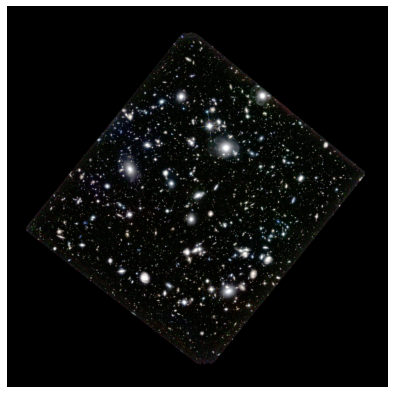

In [8]:
f,ax = plt.subplots(1,1,figsize=(7,7))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('HUDF_Color_Image.png',bbox_inches='tight',pad_inches=0,dpi=600)